### Topology Optimization

Let's take a look at a much more developed application of Devito. Here, we're going to be using Devito to solve some <a href="https://en.wikipedia.org/wiki/Topology_optimization">topology optimization</a> problems. 

Heat diffusion works similarly to flow through a material, so we can use our knowledge from our CFD examples set and adapt the mathematics for these problems and solve them using Devito.

Specifically, we'll be looking at an example that Patrick Farrell looks at using dolfin <a href="http://www.dolfin-adjoint.org/en/latest/documentation/poisson-topology/poisson-topology.html">here</a>, and rewriting a code solution with Devito. His example originally comes from <a href="Topology optimization of heat conduction problems using the finite volume method">Topology optimization of heat conduction problems using the finite volume method</a> by A. Gersborg-Hansen, M.P. Bendsøe, and O. Sigmund, which we'll reference in this article as "the paper".

Let's take look at what we want to produce, so we know where we're headed and what to compare ourselves against. We'll take the first of the test problems from the paper (displayed below).

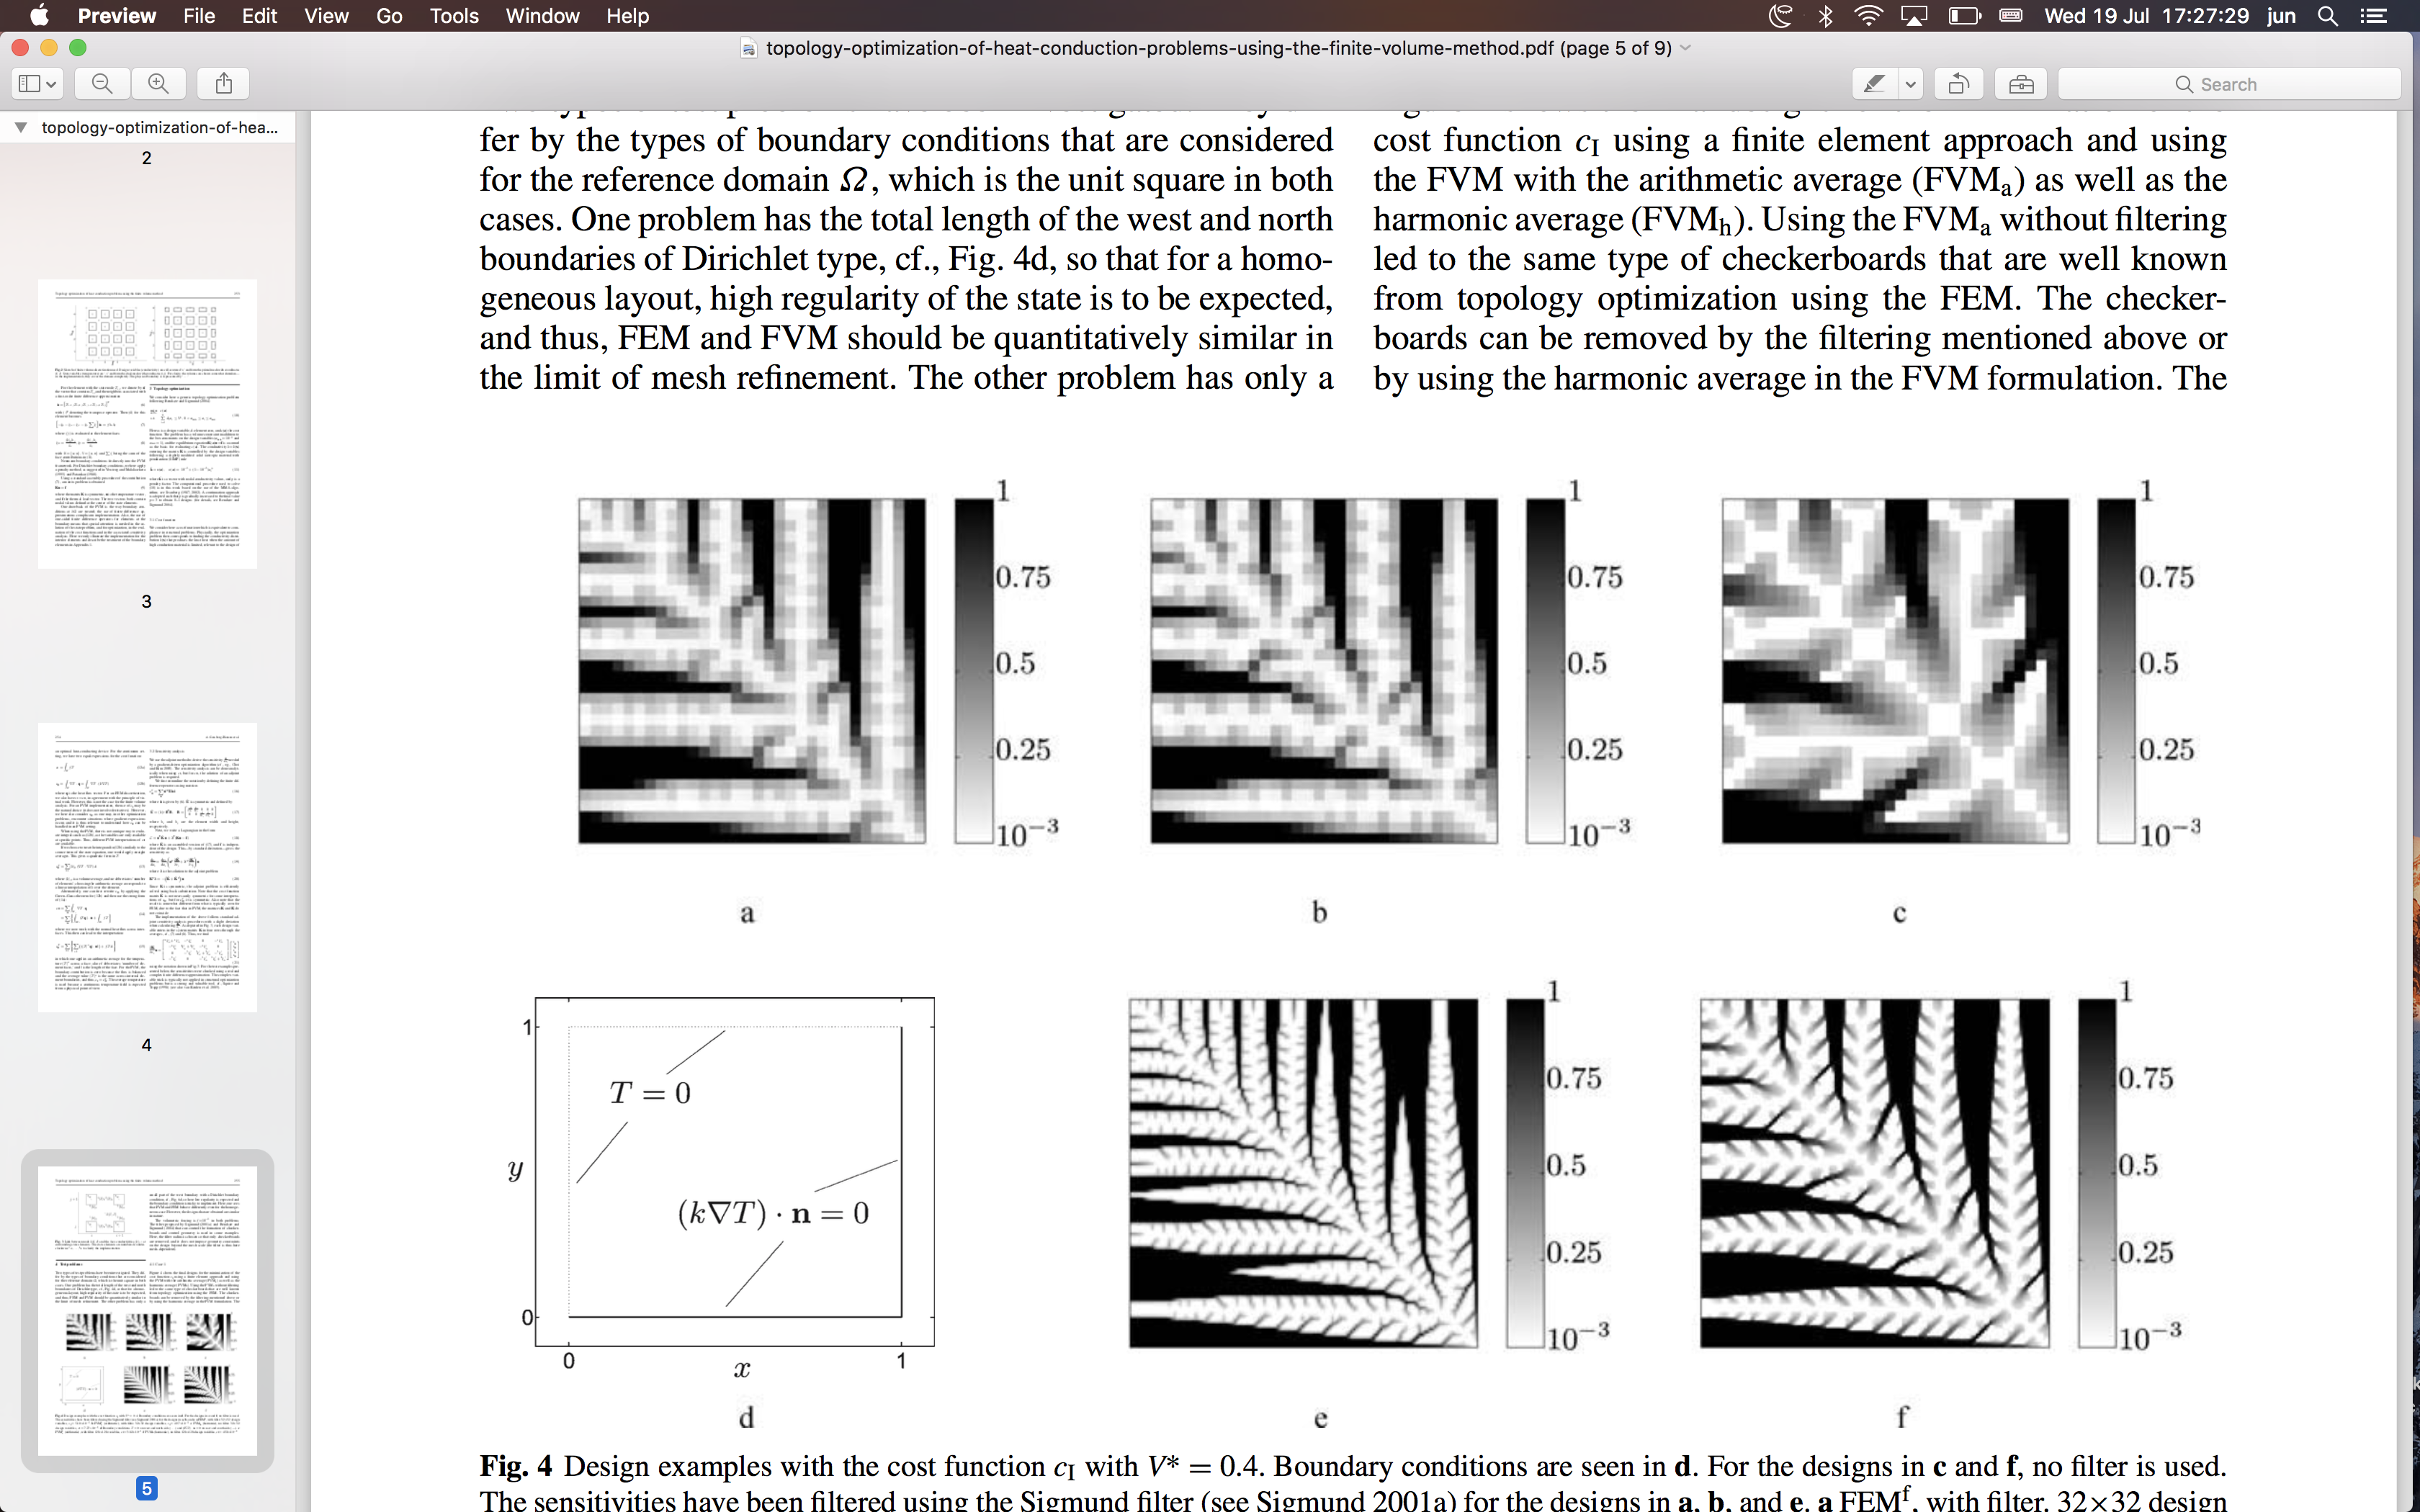

We'll take the same conditions, and see if using the same equations, we can produce the same results by just working with Devito.

We start by doing imports, initializing our 2d space, and setting up our forward time object.

In [2]:
from devito import Operator, TimeData, left, x, y
import numpy as np

from devito.finite_difference import first_derivative, left, right

# VARIABLE DECLARATIONS

# Create the 2d space for our problem
nx = 41
ny = 41
nt = 500
dx = 2. / (nx - 1) 
dy = 2. / (ny - 1)
x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)
X, Y = numpy.meshgrid(x, y)

# TODO: Define other variables for the problem
heat_conduction = 0.
vol_heat_source = 0.

# Define equations we'll use throughout our code
heat_flux = Eq(heat_conduction * t.dx) # We'll use this as an abbreviation later

# Initialize the TimeData object 't' (representing temperature). TODO: Do we need this?
temp = TimeData(name='temp', shape=(nx,ny), space_order=1) 
temp.data.fill(0.)

ModuleNotFoundError: No module named 'devito'

Now we have a 2d space that we can work with.

Before we work with this by finite differences (FD), we need to convert the equations into FD equations that we can put into our code. The math for this is roughly the same to that in CFD examples, except we're working wtith diffusion of heat rather than fluid flow.

We want to be minimizing the total heat throughout the structure, and to do this we'll work with minimizing the sum of the total heat.

In the next section, let's set up our problem. To see where we get our initial boundary conditions, just take a look at the above image taken from the paper we're getting the question from. 

The top and left sides have the Dirichlet boundary condition:

$$ T = 0 $$

and the bottom and right sides have the Neumann bondary condition:

$$ (k \nabla T) \cdot \textbf{n}=0 $$

In [ ]:
# SET UP THE PROBLEM

# Dirichlet boundary conditions
bc_u = [Eq(x.indexed[temp+1, 0, y], 0.)]      # left
bc_u += [Eq(x.indexed[temp+1, x, ny-1], 0.)]  # top

# Neumann boundary conditions
bc += [Eq(x.indexed[nx-1, y], x.indexed[nx-2, y])] # right
bc += [Eq(x.indexed[x, 0], x.indexed[x, 1])]       # bottom

# unitvec
# equations

# (Setup equations)
# Find min topology using relevant function

Next to set up our Devito equations in order to solve the problem:

In [ ]:
# SET UP THE DEVITO EQUATIONS

temp_eq = Eq(0) # TODO
stencil_temp = solve(temp_eq, temp.forward)[0]
update_temp = Eq(temp.forward, stencil_temp)

Next we create the operator:

In [ ]:
# Create the Operator
op = Operator([[update_temp] + bc_temp, subs={h:dx, s:dt},
             dse=None, dle=None)

# Execute for a number of timesteps using nt from earlier
op(time=nt+1, u=u, v=v, p=p)

And finally create the plotting function:

In [ ]:
# TODO: How to represent this graph

from matplotlib import pyplot

def plot_contour(X, Y, p, u, v):
    fig = pyplot.figure(figsize=(11,7), dpi=100)
    # plotting the pressure field as a contour
    pyplot.contourf(Y, X, p, alpha=0.5, cmap=cm.viridis)  
    pyplot.colorbar()
    # plotting the pressure field outlines
    pyplot.contour(Y, X, t, cmap=cm.viridis)
    pyplot.xlabel('X')
    pyplot.ylabel('Y')

Now let's run our code and see what we get. Hopefully it will be the same as in the images above!

In [ ]:
plot_contour(X, Y, t)